In [3]:
import json
from collections import defaultdict
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import pandas as pd
from rliable import plot_utils
plt.rcParams['text.usetex'] = False #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath' #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = ['Helveta Nue'] # Choose a nice font here
sns.set_style("whitegrid")

COLORS = ['#BBCC33', '#77AADD', '#44BB99',
           '#EEDD88', '#EE8866', '#FFAABB',
          '#99DDFF', '#44BB99', '#AAAA00',
          '#DDDDDD']
palette = sns.set_palette(COLORS)

/home/cmu/miniconda3/envs/test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### (extrapolation) reward

In [20]:
reward = pd.read_csv('data/reward.csv')
extrapolation_reward = pd.read_csv('data/extrapolation_reward.csv')

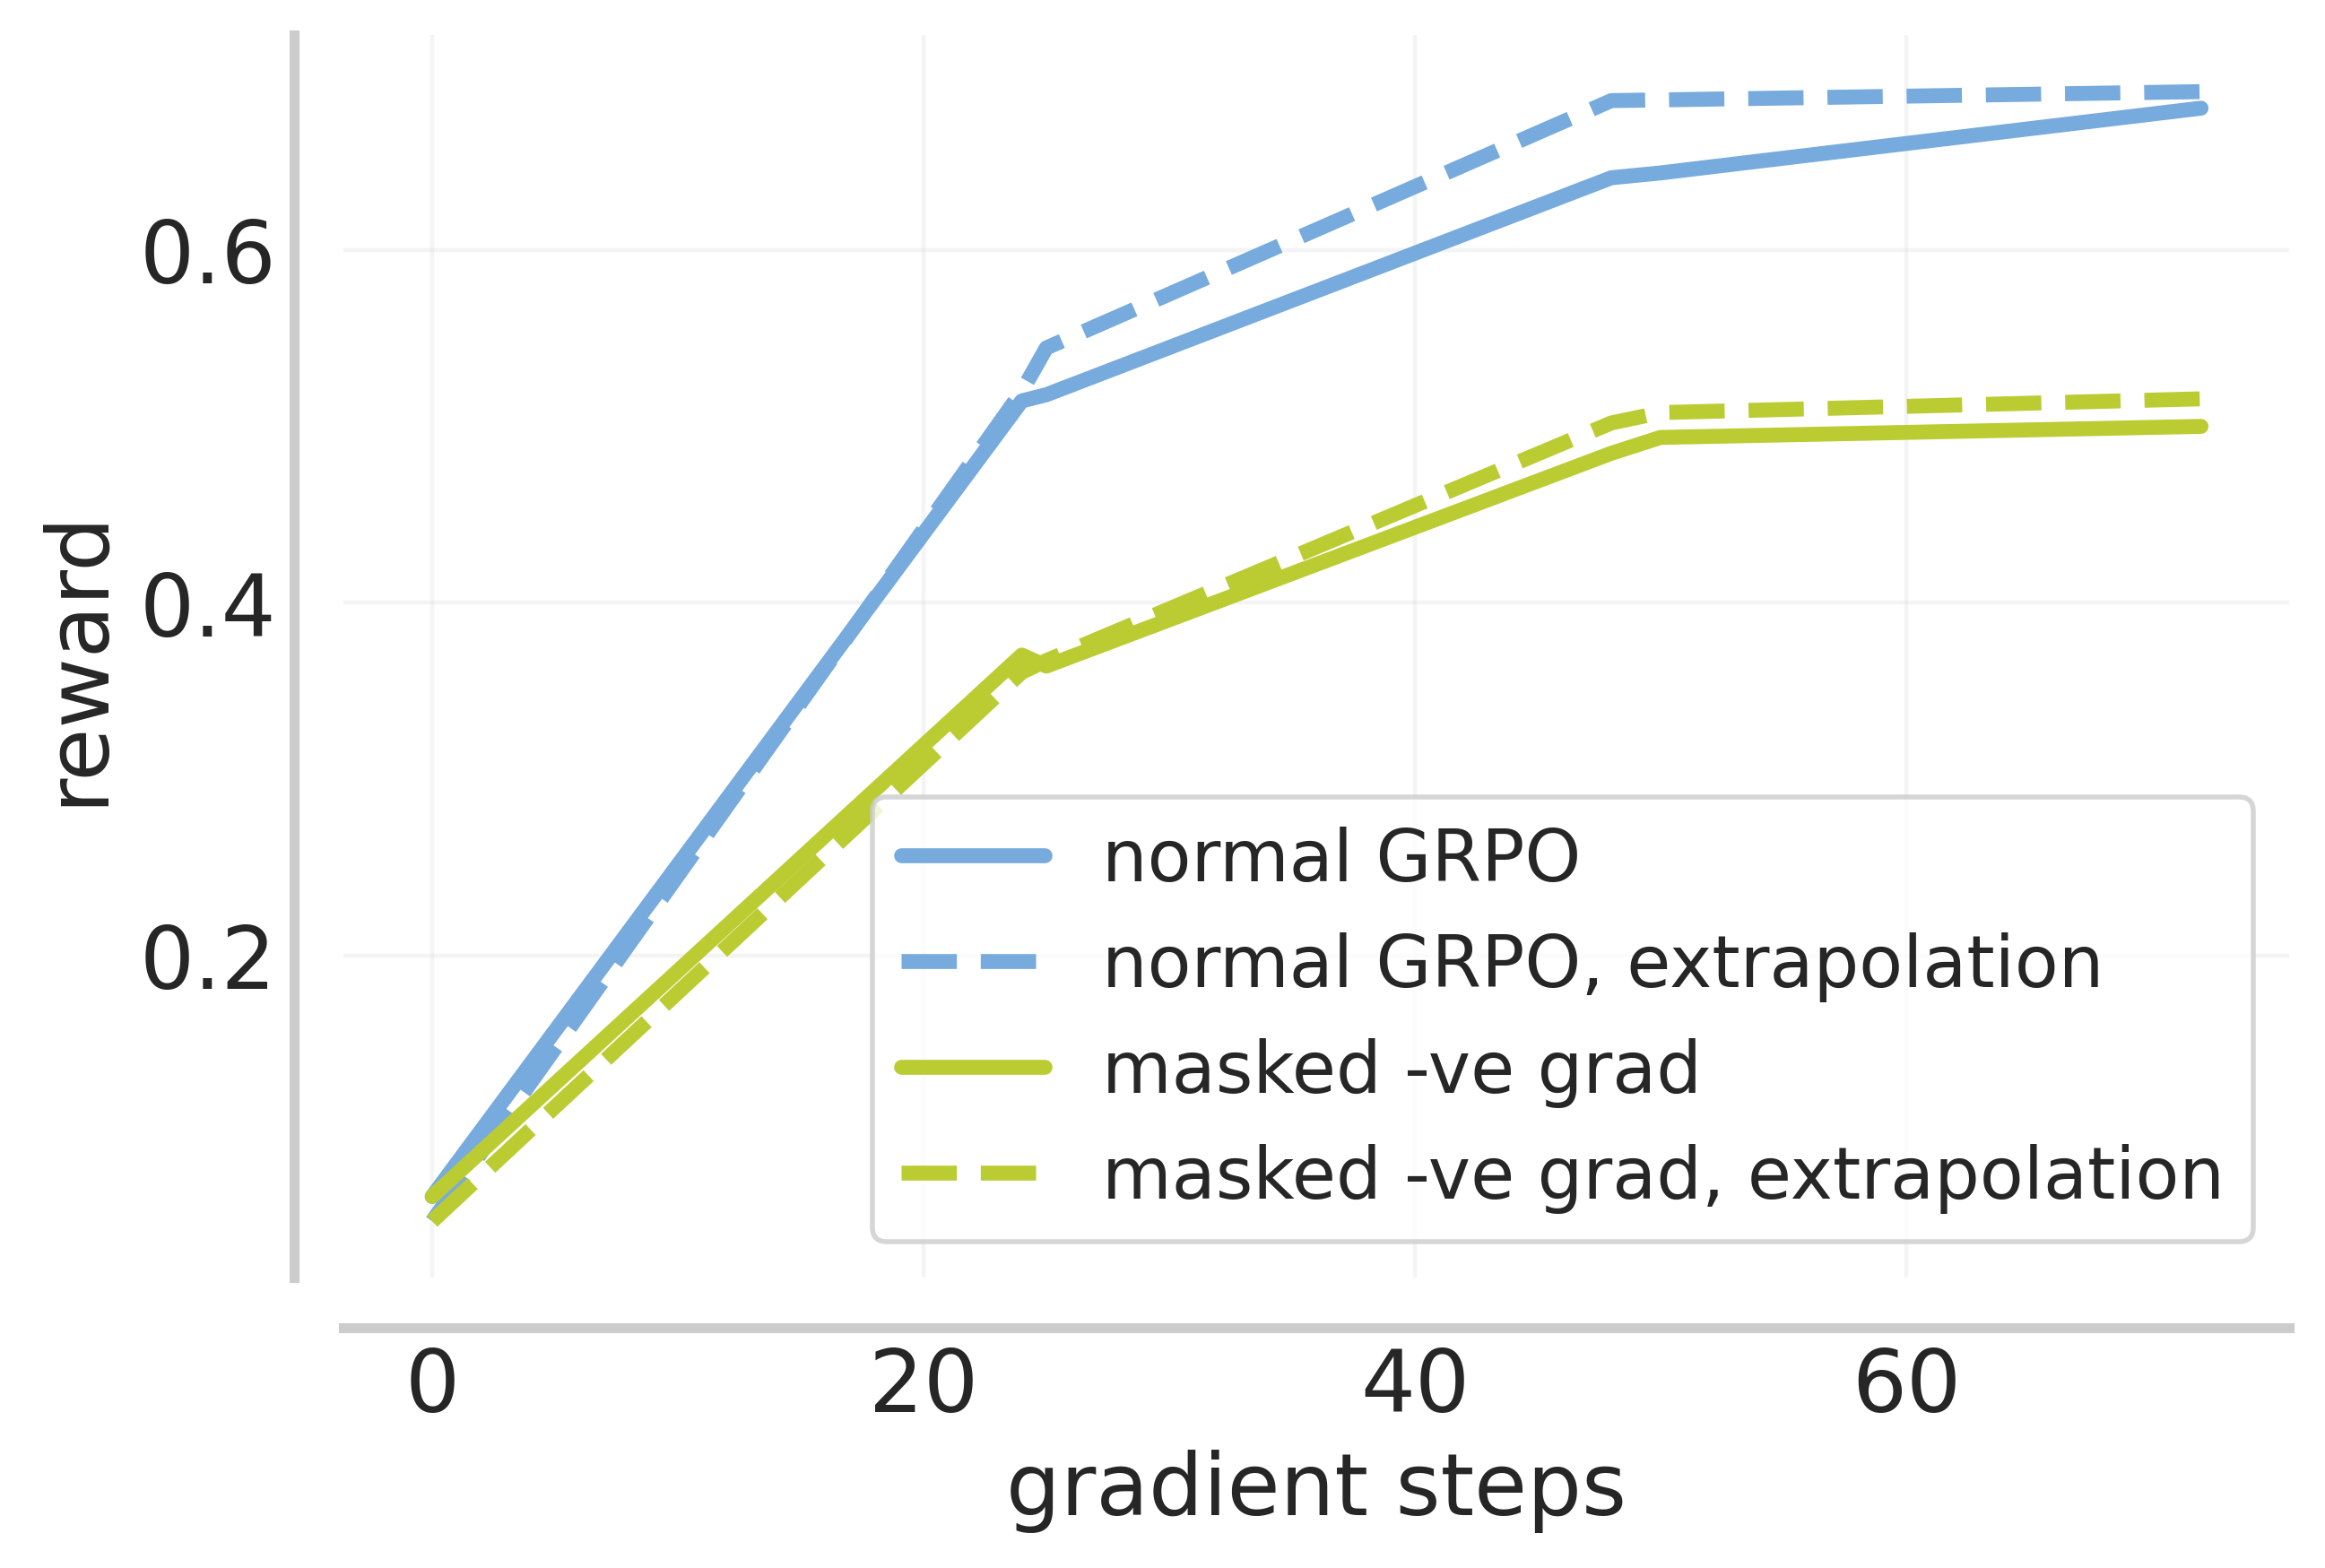

In [21]:
fig, ax = plt.subplots(figsize=(14 / 2, 4.5), dpi=400)

sns.lineplot(data=reward, x='Step', y='train-5-5-normal-2048 - val/reward/5', ax=ax, linewidth=3, markersize=8, color=COLORS[1], label='normal GRPO')
sns.lineplot(data=extrapolation_reward, x='Step', y='train-5-5-normal-2048 - extrapolation_val/reward/5', ax=ax, linewidth=3, markersize=8, color=COLORS[1], linestyle='--', label='normal GRPO, extrapolation')

sns.lineplot(data=reward, x='Step', y='train-5-5-positive-2048 - val/reward/5', ax=ax, linewidth=3, markersize=8, color=COLORS[0], label='masked -ve grad')
sns.lineplot(data=extrapolation_reward, x='Step', y='train-5-5-positive-2048 - extrapolation_val/reward/5', ax=ax, linewidth=3, markersize=8, color=COLORS[0], linestyle='--', label='masked -ve grad, extrapolation')

plt.rcParams["legend.loc"] = "lower right"

plot_utils._annotate_and_decorate_axis(ax,
                                        xlabel='gradient steps',
                                        ylabel='reward',
                                        labelsize='xx-large',
                                        ticklabelsize='xx-large',
                                        grid_alpha=0.2,
                                        legend=True)
plt.show()

### OOD (extrapolation) reward

In [22]:
ood_reward = pd.read_csv('data/ood_reward.csv')
extrapolation_ood_reward = pd.read_csv('data/extrapolation_ood_reward.csv')

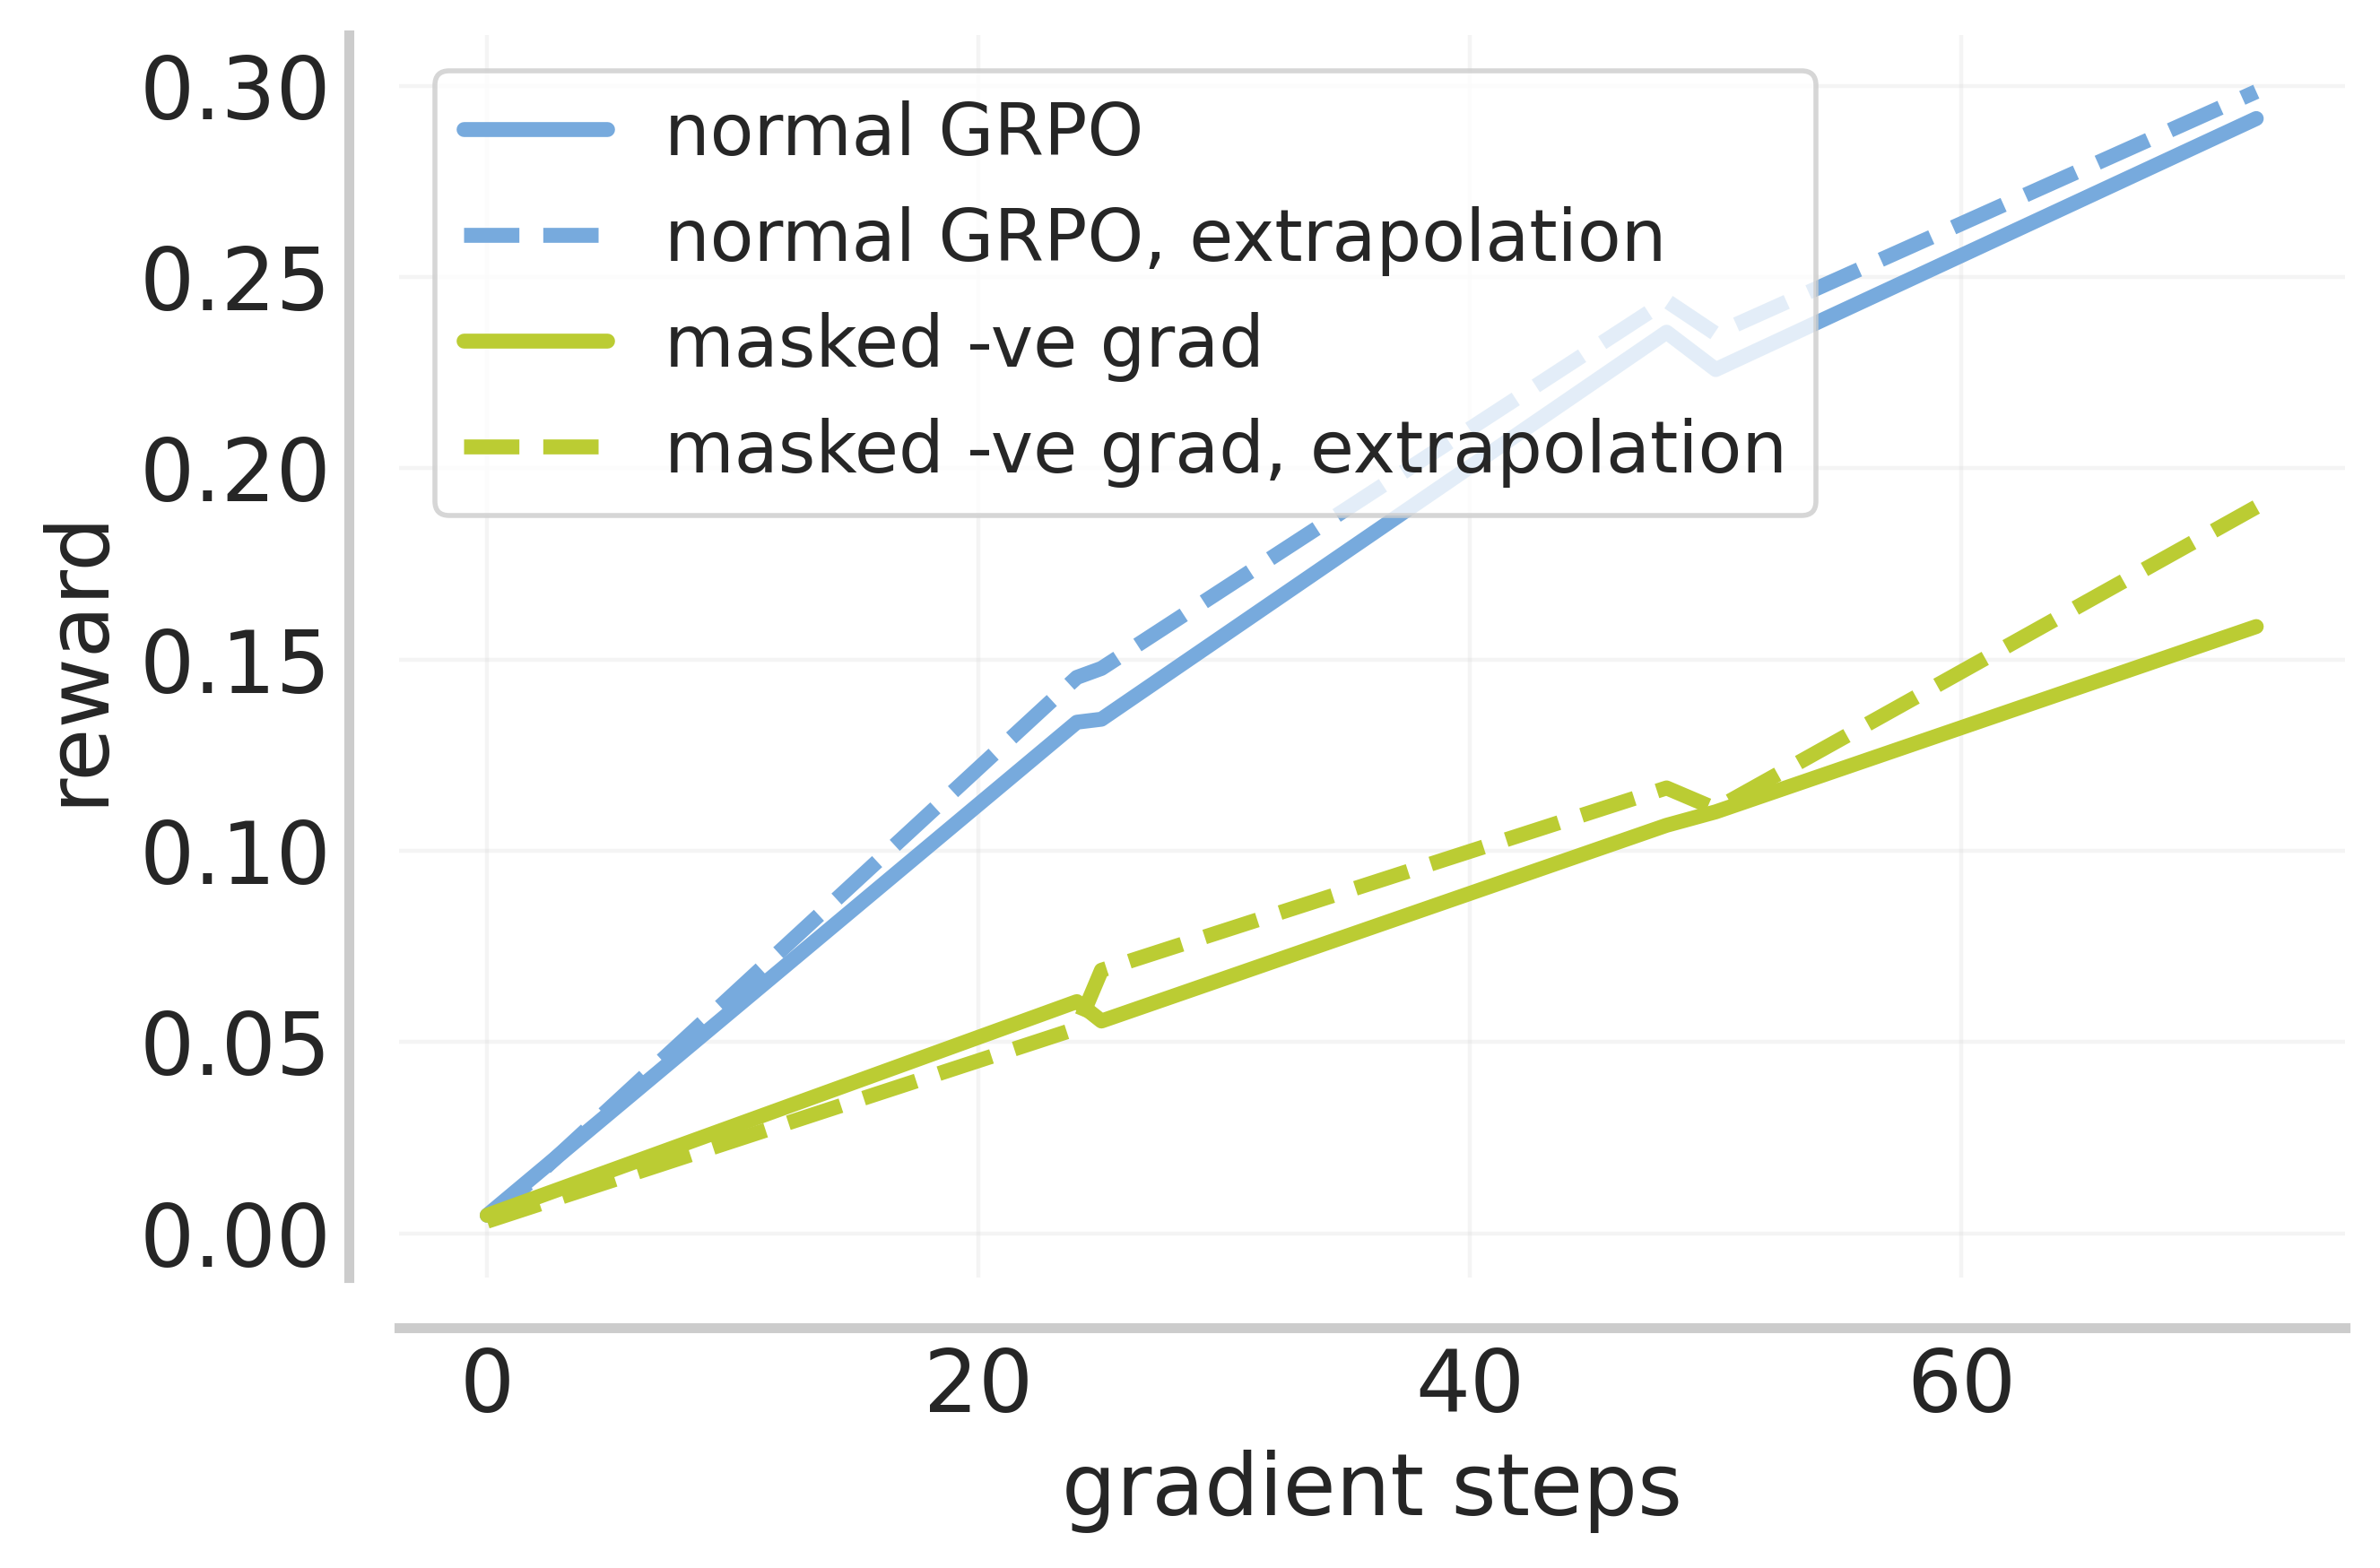

In [26]:
fig, ax = plt.subplots(figsize=(14 / 2, 4.5), dpi=400)

sns.lineplot(data=ood_reward, x='Step', y='train-5-5-normal-2048 - val/reward/6', ax=ax, linewidth=3, markersize=8, color=COLORS[1], label='normal GRPO')
sns.lineplot(data=extrapolation_ood_reward, x='Step', y='train-5-5-normal-2048 - extrapolation_val/reward/6', ax=ax, linewidth=3, markersize=8, color=COLORS[1], linestyle='--', label='normal GRPO, extrapolation')

sns.lineplot(data=ood_reward, x='Step', y='train-5-5-positive-2048 - val/reward/6', ax=ax, linewidth=3, markersize=8, color=COLORS[0], label='masked -ve grad')
sns.lineplot(data=extrapolation_ood_reward, x='Step', y='train-5-5-positive-2048 - extrapolation_val/reward/6', ax=ax, linewidth=3, markersize=8, color=COLORS[0], linestyle='--', label='masked -ve grad, extrapolation')

plt.rcParams["legend.loc"] = "upper left"

plot_utils._annotate_and_decorate_axis(ax,
                                        xlabel='gradient steps',
                                        ylabel='reward',
                                        labelsize='xx-large',
                                        ticklabelsize='xx-large',
                                        grid_alpha=0.2,
                                        legend=True)
plt.show()